# Análise dos Dados obtidos

## Limpar os dados

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

In [120]:
import os

path = os.getcwd().replace('/data_analysis', '') + '/data.txt'

In [121]:
# pegar valores aleatórios pra por no data_test.txt

import random

lista = list()
for i in range(0,10):
    lista.append(round(random.uniform(2.0, 5.0), 2))

print(lista)


[3.29, 3.08, 4.5, 2.38, 4.01, 2.3, 3.86, 3.73, 3.57, 2.29]


In [122]:
f = open(path)
# f = open('data_test.txt')

lines = list()
for data in f:
    lines.append(data)


# TAMPOP e MAX_INFO_LEN
TAMPOP = int(lines[1].split('\t')[0].split(' ')[2])
MAX_INFO_LEN = int(lines[1].split('\t')[1].split(' ')[2])

# fitness function
fitness = list()
for gen in range(0,100):
    try:
        fitness.append(lines[lines.index('Generation: ' + str(gen) + '\n') + 2].split())
    except ValueError:
        break

f.close()


## Criação dos eixos e modelos e plotagem

In [123]:
# eixo X
X = list()
for i in range(0,gen + 1):
    X.append(i)

X = np.array(X)

print(len(X))

100


In [124]:
# eixo Y (em andamento ainda)

y0 = list()
y1 = list()
y2 = list()
n0 = randrange(TAMPOP - 1)
n1 = randrange(TAMPOP - 1)
n2 = randrange(TAMPOP - 1)

for fit in fitness:
    y0.append(float(fit[n0]))
    y1.append(float(fit[n1]))
    y2.append(float(fit[n2]))

print(len(y0))

100


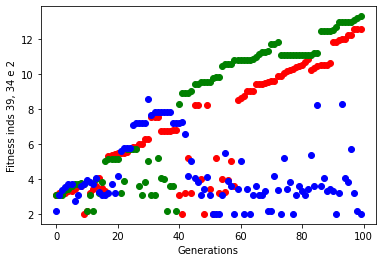

In [125]:
plt.scatter(X, y0, c='r')
plt.scatter(X, y1, c='g')
plt.scatter(X, y2, c='b')
plt.xlabel('Generations')
plt.ylabel(f'Fitness inds {n0}, {n1} e {n2}')
plt.show()

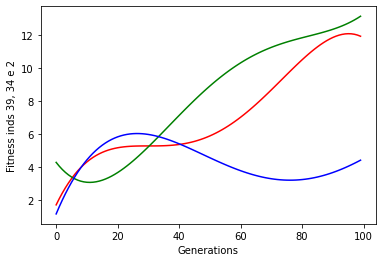

In [126]:
modelo0 = np.poly1d(np.polyfit(X, y0, 4))
modelo1 = np.poly1d(np.polyfit(X, y1, 4))
modelo2 = np.poly1d(np.polyfit(X, y2, 4))

my0 = modelo0(X)
my1 = modelo1(X)
my2 = modelo2(X)

plt.plot(X, my0, c='r')
plt.plot(X, my1, c='g')
plt.plot(X, my2, c='b')
plt.xlabel('Generations')
plt.ylabel(f'Fitness inds {n0}, {n1} e {n2}')
plt.show()

In [127]:
# TENTAR plotar todos os individuos

indivs = list()
indiv = list()
for i in range(0, TAMPOP):
    indiv.clear()
    for fit in fitness:
        indiv.append(float(fit[i]))
    indivs.append(indiv.copy())

# print(indivs)


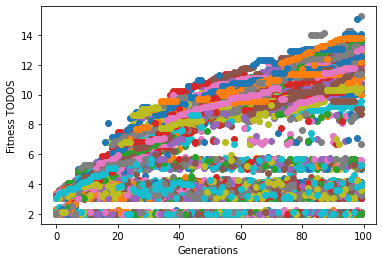

In [128]:
for pop in range(0, TAMPOP):
    y = indivs[pop]
    plt.scatter(X, y)
plt.xlabel('Generations')
plt.ylabel('Fitness TODOS')
plt.show()

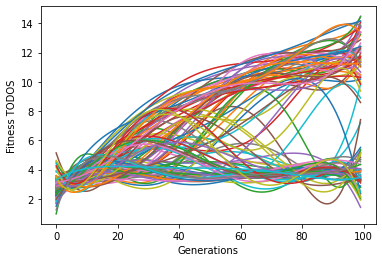

In [129]:
for pop in range(0, TAMPOP):
    y = indivs[pop]
    modelo = np.poly1d(np.polyfit(X, y, 5))
    y = modelo(X)
    plt.plot(X, y)
plt.xlabel('Generations')
plt.ylabel('Fitness TODOS')
plt.show()

In [130]:
maior = sorted([float(elem) for elem in fitness[gen - 1]])[TAMPOP - 1]
melhor = fitness[gen - 1].index(str(maior))

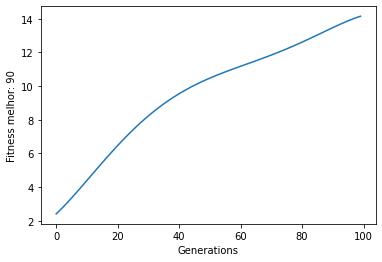

In [131]:
y = indivs[melhor]
modelo = np.poly1d(np.polyfit(X, y, 5))
y = modelo(X)
plt.plot(X, y)
plt.xlabel('Generations')
plt.ylabel(f'Fitness melhor: {melhor}')
plt.show()

In [132]:
media = list()
media2 = list()
soma = 0
soma2 = 0
for fit in fitness:
    soma = 0
    soma2 = 0
    for i in range(0, TAMPOP):
        soma += float(fit[i])
        if i != melhor:
            soma2 += float(fit[i])
    media.append(round((soma)/(TAMPOP), 2))
    media2.append(round((soma2)/(TAMPOP - 1), 2))


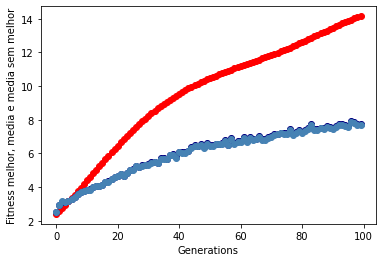

In [133]:
ym1 = media
ym2 = media2
plt.scatter(X, y, color='r')
plt.scatter(X, ym1, color='navy')
plt.scatter(X, ym2, color='steelblue')
plt.xlabel('Generations')
plt.ylabel('Fitness melhor, media e media sem melhor')
plt.show()

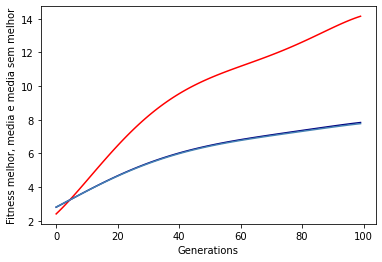

In [134]:
modelom1 = np.poly1d(np.polyfit(X, ym1, 5))
modelom2 = np.poly1d(np.polyfit(X, ym2, 5))
ym1 = modelom1(X)
ym2 = modelom2(X)
plt.plot(X, y, color='r')
plt.plot(X, ym1, color='navy')
plt.plot(X, ym2, color='steelblue')
plt.xlabel('Generations')
plt.ylabel('Fitness melhor, media e media sem melhor')
plt.show()